# Group Project - COSC 3337
## Authors: Miranda Chavez, 2266537, Umar Hussain 1627677, Shiv Vyas 2230744

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
df = pd.read_csv('owid_covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


### Task 1: Preprocessing: Standardizing and Filling in Missing Values

In [3]:
countries = df['location'].unique()#list of countries
columns = list(df)#list of columns
scaler = MinMaxScaler().set_output(transform='pandas')#scale by minmax, since values are all positive and doesn't follow a normal distribution, when sorting values by date

stand_df = df#make a copy of df
stand_df = stand_df.sort_values(by='date')#sort values by date so the shape of the data is consistent and doesn't fluctuate when sorted by country
cs = stand_df.select_dtypes(exclude='object')#only scale numerical objects
cs = cs.loc[:, cs.sum() > 0]#get columns where the sum is greater than 0, so there's no dividing by 0
cols = cs.columns
stand_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
243694,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,21.400,87.847,1.380,75.05,0.779,127504120,NaN,NaN,NaN,NaN
15066,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,27.700,NaN,5.000,76.67,0.845,45510324,NaN,NaN,NaN,NaN
243695,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,21.400,87.847,1.380,75.05,0.779,127504120,NaN,NaN,NaN,NaN
15067,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,27.700,NaN,5.000,76.67,0.845,45510324,NaN,NaN,NaN,NaN
243696,MEX,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,21.400,87.847,1.380,75.05,0.779,127504120,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217093,LTU,Europe,Lithuania,2024-08-14,NaN,NaN,NaN,NaN,NaN,NaN,...,38.000,NaN,6.560,75.93,0.882,2750058,NaN,NaN,NaN,NaN
230301,MYS,Asia,Malaysia,2024-08-14,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400,NaN,1.900,76.16,0.810,33938216,NaN,NaN,NaN,NaN
21775,OWID_ASI,NaN,Asia,2024-08-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4721383370,NaN,NaN,NaN,NaN
424412,OWID_WRL,NaN,World,2024-08-14,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.130,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN


In [4]:
stand_df.loc[:,cols] = scaler.fit_transform(stand_df[cols])#fit and transform scaler to stand_df
stand_df = stand_df.sort_index()#sort stand_df to normal
stand_df

/var/folders/15/5_06gwdn0rs16jky7k2nfmvr0000gn/T/ipykernel_8499/3583304889.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01598776 0.00570654 0.01598776 ... 0.59201519 1.         0.05644399]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stand_df.loc[:,cols] = scaler.fit_transform(stand_df[cols])#fit and transform scaler to stand_df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.000000,0.0,NaN,0.000000,0.0,NaN,...,NaN,0.369975,0.029197,0.345085,0.207815,0.005157,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.000000,0.0,NaN,0.000000,0.0,NaN,...,NaN,0.369975,0.029197,0.345085,0.207815,0.005157,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.000000,0.0,NaN,0.000000,0.0,NaN,...,NaN,0.369975,0.029197,0.345085,0.207815,0.005157,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.000000,0.0,NaN,0.000000,0.0,NaN,...,NaN,0.369975,0.029197,0.345085,0.207815,0.005157,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.000000,0.0,NaN,0.000000,0.0,NaN,...,NaN,0.369975,0.029197,0.345085,0.207815,0.005157,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,0.000343,0.0,0.0,0.000813,0.0,0.0,...,0.326705,0.360310,0.116788,0.245294,0.314387,0.002046,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,0.000343,0.0,0.0,0.000813,0.0,0.0,...,0.326705,0.360310,0.116788,0.245294,0.314387,0.002046,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,0.000343,0.0,0.0,0.000813,0.0,0.0,...,0.326705,0.360310,0.116788,0.245294,0.314387,0.002046,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,0.000343,0.0,0.0,0.000813,0.0,0.0,...,0.326705,0.360310,0.116788,0.245294,0.314387,0.002046,NaN,NaN,NaN,NaN


### Note: The cell below takes approximately 3 minutes to run

In [5]:
#Note: This cell takes approximately 3 minutes to run
df_prep = pd.DataFrame(columns=columns)#empty dataframe to add preprocessed data
ls_prep = []#list for faster concatenation

for c in countries:#preprocess one country at a time
    temp_df = df[df['location'] == c]#create subdataframe for each country

    if temp_df['continent'].notnull().any():#checks to see if 'country' is a country or a continent
        temp_df.reset_index(drop=True, inplace=True)#reset indexes

        for i in columns:#iterate through the columns
            cont_df = df[df['location'] == temp_df['continent'][0]]#create subdataframe matching the country's continent
            cont_df.reset_index(drop=True, inplace=True)
            temp_df.loc[:,i] = temp_df[i].fillna(cont_df[i])#insert values from the continent dataframe

            if(is_numeric_dtype(temp_df[i])):
                temp_df.loc[:,i] = temp_df[i].interpolate(method='linear')#interpolate values if they are numeric

            temp_df.loc[:,i] = temp_df[i].fillna(0)#fill the rest of nan's with 0s
    ls_prep.append(temp_df)#append each country to a list

/var/folders/15/5_06gwdn0rs16jky7k2nfmvr0000gn/T/ipykernel_8499/3174578181.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df.loc[:,i] = temp_df[i].fillna(cont_df[i])#insert values from the continent dataframe
/var/folders/15/5_06gwdn0rs16jky7k2nfmvr0000gn/T/ipykernel_8499/3174578181.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df.loc[:,i] = temp_df[i].fillna(0)#fill the rest of nan's with 0s


In [6]:
df_prep = pd.concat(ls_prep)#preprocessed dataframe
df_prep.reset_index(drop=True, inplace=True)#reset indices
df_prep.loc[:,:] = df_prep.fillna(0)#fills any missed null variables with 0s
df_prep

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,0.0,0.0,0.0,0.0
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,0.0,0.0,0.0,0.0
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,0.0,0.0,0.0,0.0
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,0.0,0.0,0.0,0.0


### Task 2: Finding Correlations between different features

In [7]:
sub_df = df_prep.select_dtypes(exclude='object')#only find correlation between numerical values
cols = sub_df.columns#get the columns of the numerical values
cols = cols.drop(['population'])#dropping population feature
y = sub_df[cols]
cor = y.corr(method="pearson")#find the correlation between features
cor

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.129439,0.344293,0.942444,0.098026,0.262516,0.081875,0.001725,0.004647,0.123833,...,-0.050813,-0.071206,-0.038835,-0.067912,-0.274418,-0.115077,0.059574,-0.055694,-0.032912,-0.035084
new_cases,0.129439,1.000000,0.375871,0.156381,0.500614,0.185186,-0.000772,0.115959,0.036526,0.013322,...,-0.013651,-0.019092,-0.011579,-0.017174,-0.061934,-0.030744,0.002952,-0.014206,-0.001489,-0.014026
new_cases_smoothed,0.344293,0.375871,1.000000,0.415965,0.183855,0.492684,-0.002034,0.036009,0.097213,0.035451,...,-0.036280,-0.050739,-0.030816,-0.045639,-0.164844,-0.081722,0.008095,-0.037733,-0.003960,-0.037138
total_deaths,0.942444,0.156381,0.415965,1.000000,0.161464,0.432462,0.046117,0.002396,0.006458,0.144349,...,-0.056245,-0.080285,-0.030903,-0.086248,-0.320227,-0.136439,0.103061,-0.047014,-0.034091,-0.030824
new_deaths,0.098026,0.500614,0.183855,0.161464,1.000000,0.373170,-0.020391,0.064807,0.012707,0.004892,...,-0.019706,-0.028856,-0.013663,-0.028954,-0.096620,-0.048580,0.008735,-0.018389,0.000662,-0.022727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_development_index,-0.115077,-0.030744,-0.081722,-0.136439,-0.048580,-0.130018,-0.000266,-0.003738,-0.010123,0.172850,...,0.499349,0.592260,0.260710,0.505378,0.500750,1.000000,0.189948,0.289878,0.103039,0.311897
excess_mortality_cumulative_absolute,0.059574,0.002952,0.008095,0.103061,0.008735,0.023970,0.071233,-0.001523,-0.003773,0.293864,...,0.186603,0.156098,0.027429,0.155642,0.094064,0.189948,1.000000,0.319751,0.067818,0.424588
excess_mortality_cumulative,-0.055694,-0.014206,-0.037733,-0.047014,-0.018389,-0.048823,0.170590,0.013875,0.038704,0.502378,...,0.171235,0.179752,0.149586,0.183836,0.212449,0.289878,0.319751,1.000000,0.445054,0.730298
excess_mortality,-0.032912,-0.001489,-0.003960,-0.034091,0.000662,0.001394,0.058189,0.043748,0.121936,0.128673,...,0.082293,0.063811,0.050898,0.070910,0.131625,0.103039,0.067818,0.445054,1.000000,0.197664


In [8]:
fil_cor = cor.where(cor < 1)#find the maximum correlation with each features, which are less than 1
max = fil_cor.max()
maxcor = cor[cor.isin(max)]
maxcor = maxcor[~maxcor.index.map(frozenset).duplicated()]#maxcor is a symmetric dataframe, so we remove any duplicates
maxcor.stack()#returns the maximum correlations between features

total_cases                                 total_deaths                                  0.942444
new_cases                                   new_deaths                                    0.500614
new_cases_smoothed                          new_deaths_smoothed                           0.492684
total_deaths                                total_cases                                   0.942444
new_deaths                                  new_cases                                     0.500614
new_deaths_smoothed                         new_cases_smoothed                            0.492684
total_cases_per_million                     total_boosters_per_hundred                    0.624193
new_cases_per_million                       new_cases_smoothed_per_million                0.370373
new_cases_smoothed_per_million              new_cases_per_million                         0.370373
total_deaths_per_million                    excess_mortality_cumulative_per_million       0.749389
new_deaths

In [9]:
fil_cor = cor.where(cor > -1)#find the highest inverse correlation among features
min = fil_cor.min()
mincor = cor[cor.isin(min)]
mincor = mincor[~mincor.index.map(frozenset).duplicated()]#same as maxcor, mincor is symmetric
mincor.stack()

total_cases                                 life_expectancy                       -0.274418
new_cases                                   life_expectancy                       -0.061934
new_cases_smoothed                          life_expectancy                       -0.164844
total_deaths                                life_expectancy                       -0.320227
new_deaths                                  life_expectancy                       -0.096620
new_deaths_smoothed                         life_expectancy                       -0.258992
total_cases_per_million                     stringency_index                      -0.307167
new_cases_per_million                       cardiovasc_death_rate                 -0.037252
new_cases_smoothed_per_million              cardiovasc_death_rate                 -0.100577
total_deaths_per_million                    extreme_poverty                       -0.244950
new_deaths_per_million                      total_boosters                      

### Note: The cell below creates the csv files already included

In [10]:
cor = cor[~cor.index.map(frozenset).duplicated()] #remove duplicates of total correlation
stackedcor = cor.stack()
stackedcor = stackedcor.sort_values()#sort by increasing correlation

stackedmaxcor = maxcor.stack()
stackedmaxcor = stackedmaxcor.to_frame()
stackedmaxcor = stackedmaxcor.sort_values(0)

stackedinvcor = mincor.stack()
stackedinvcor = stackedinvcor.to_frame()
stackedinvcor = stackedinvcor.sort_values(0)

stackedcor.to_csv('Total_Correlation.csv')
stackedmaxcor.to_csv('Total_Max_Correlation.csv')
stackedinvcor.to_csv('Total_Max_Inverse_Correlation.csv')

### Plots for the correlation between various features

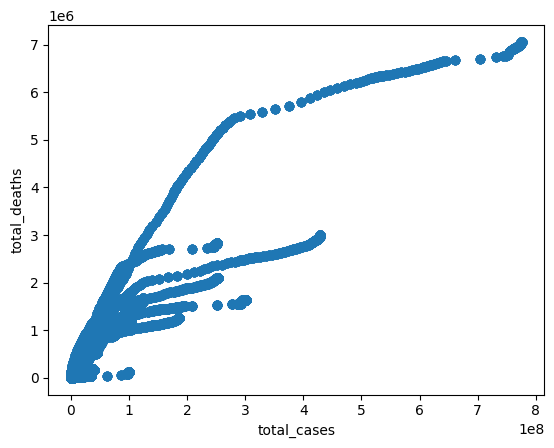

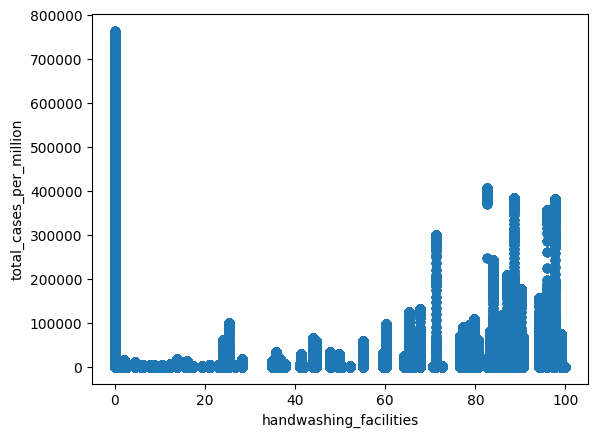

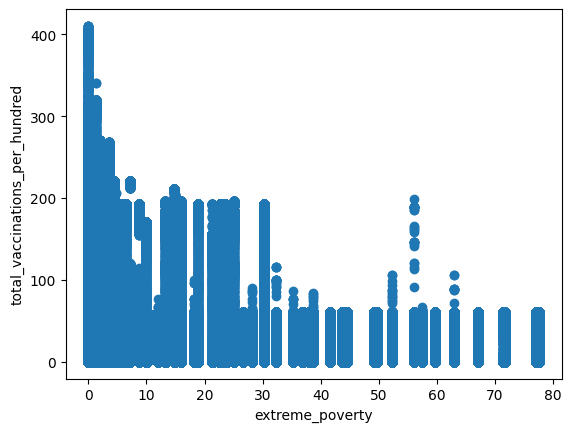

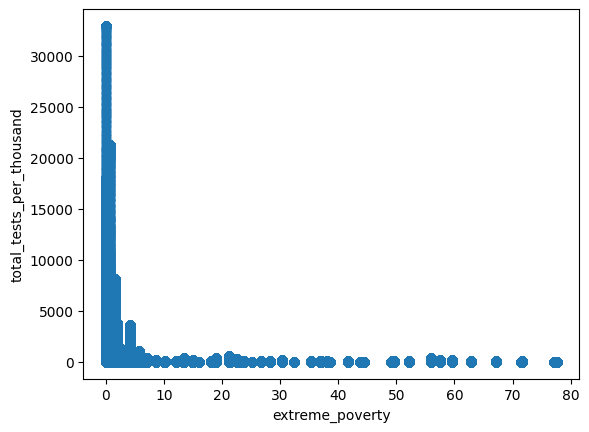

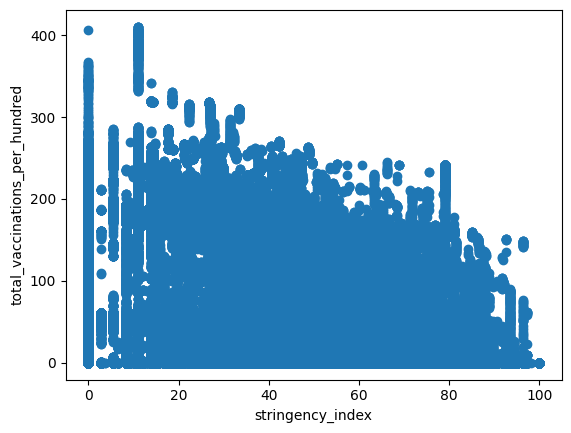

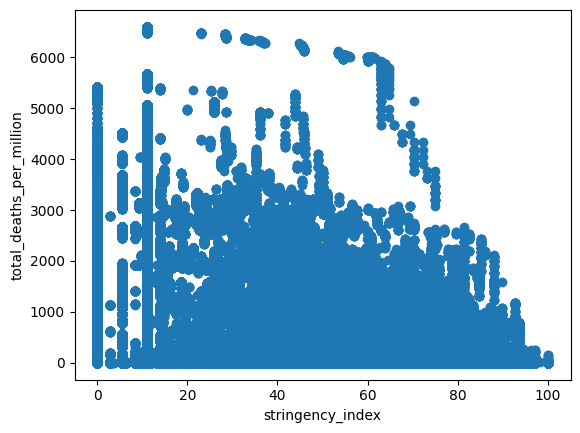

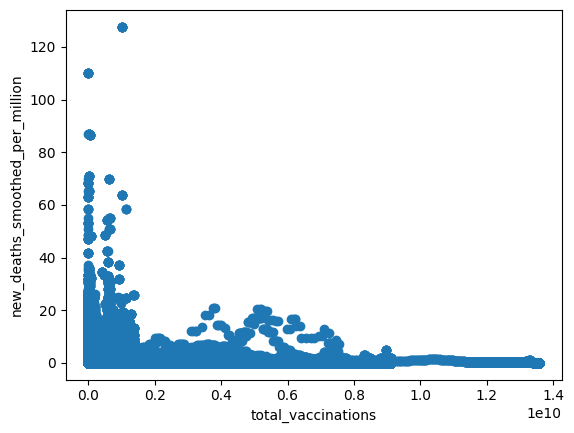

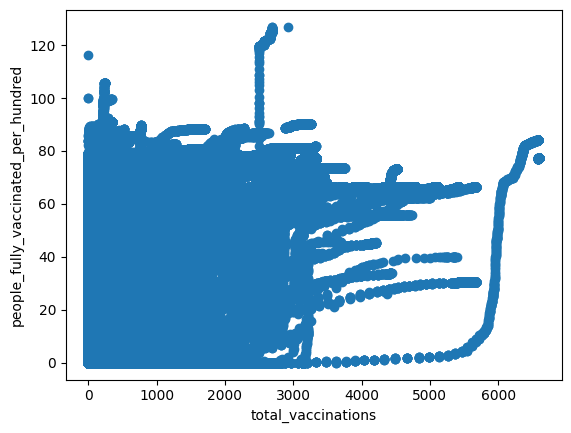

In [11]:
plt.scatter(df_prep['total_cases'], df_prep['total_deaths'])
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.show()

plt.scatter(df_prep['handwashing_facilities'], df_prep['total_cases_per_million'])
plt.xlabel('handwashing_facilities')
plt.ylabel('total_cases_per_million')
plt.show()

plt.scatter(df_prep['extreme_poverty'], df_prep['total_vaccinations_per_hundred'])
plt.xlabel('extreme_poverty')
plt.ylabel('total_vaccinations_per_hundred')
plt.show()

plt.scatter(df_prep['extreme_poverty'], df_prep['total_tests_per_thousand'])
plt.xlabel('extreme_poverty')
plt.ylabel('total_tests_per_thousand')
plt.show()

plt.scatter(df_prep['stringency_index'], df_prep['total_vaccinations_per_hundred'])
plt.xlabel('stringency_index')
plt.ylabel('total_vaccinations_per_hundred')
plt.show()

plt.scatter(df_prep['stringency_index'], df_prep['total_deaths_per_million'])
plt.xlabel('stringency_index')
plt.ylabel('total_deaths_per_million')
plt.show()

plt.scatter(df_prep['total_vaccinations'], df_prep['new_deaths_smoothed_per_million'])
plt.xlabel('total_vaccinations')
plt.ylabel('new_deaths_smoothed_per_million')
plt.show()

plt.scatter(df_prep['total_deaths_per_million'], df_prep['people_fully_vaccinated_per_hundred'])
plt.xlabel('total_vaccinations')
plt.ylabel('people_fully_vaccinated_per_hundred')
plt.show()

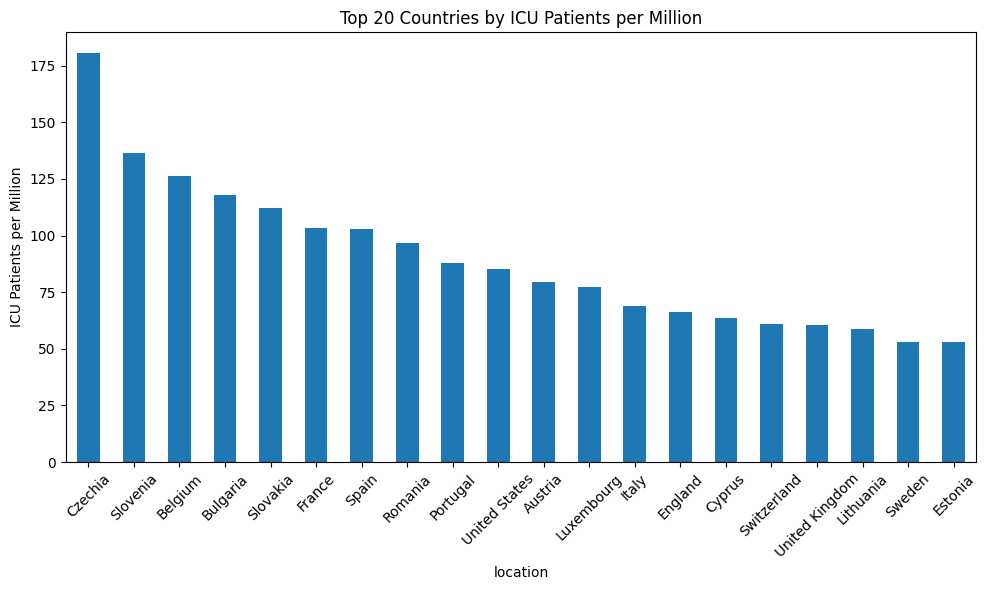

In [12]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for relevant severity columns
severity_columns = [
    'location', 'date', 'icu_patients', 'hosp_patients', 
    'total_cases', 'total_deaths', 'population'
]

df_severity = df[severity_columns].dropna(subset=['icu_patients', 'hosp_patients'])

# Group by country: get max values of ICU and hospital patients
country_severity = df_severity.groupby('location')[['icu_patients', 'hosp_patients', 'total_deaths']].max()

# Normalize by population for fair comparison
if 'population' in df.columns:
    population = df.groupby('location')['population'].max()
    country_severity = country_severity.join(population)
    country_severity['icu_patients_per_million'] = (country_severity['icu_patients'] / country_severity['population']) * 1e6
    country_severity['hosp_patients_per_million'] = (country_severity['hosp_patients'] / country_severity['population']) * 1e6
    country_severity['total_deaths_per_million'] = (country_severity['total_deaths'] / country_severity['population']) * 1e6

# Sort by ICU patients per million
severity_sorted = country_severity.sort_values(by='icu_patients_per_million', ascending=False)

# Plot top 20 countries with highest ICU use per million
severity_sorted.head(20)['icu_patients_per_million'].plot(kind='bar', figsize=(10, 6), title='Top 20 Countries by ICU Patients per Million')
plt.ylabel('ICU Patients per Million')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

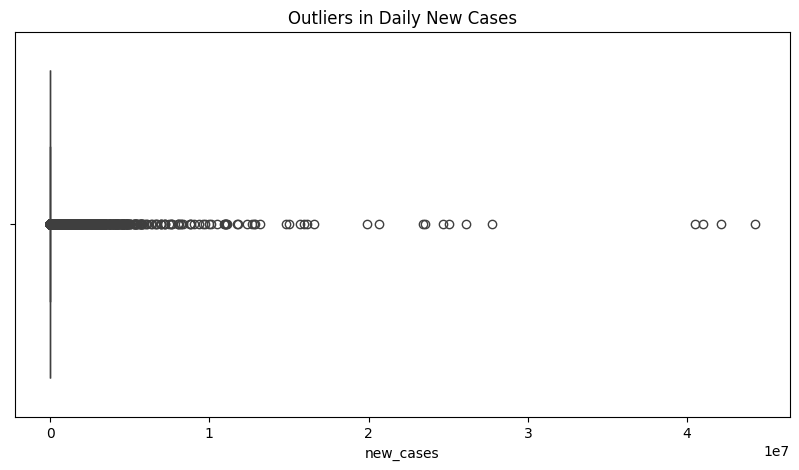

In [13]:
# Boxplot for outlier detection
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["new_cases"])
plt.title("Outliers in Daily New Cases")
plt.show()


🔍 Correlation with 'avg_new_cases':
total_cases                0.664497
total_deaths               0.635937
total_vaccinations         0.123752
gdp_per_capita             0.003843
aged_65_older             -0.074678
handwashing_facilities    -0.074965
extreme_poverty           -0.085839
smokers                   -0.123480
diabetes_prevalence       -0.192494
human_development_index   -0.198558
Name: avg_new_cases, dtype: float64

🔍 Correlation with 'total_cases':
total_deaths               0.936207
avg_new_cases              0.664497
gdp_per_capita             0.055186
aged_65_older             -0.018577
total_vaccinations        -0.060387
extreme_poverty           -0.099279
smokers                   -0.116080
handwashing_facilities    -0.130004
human_development_index   -0.150673
diabetes_prevalence       -0.171183
Name: total_cases, dtype: float64

🔍 Correlation with 'total_deaths':
total_cases                0.936207
avg_new_cases              0.635937
gdp_per_capita             0.0

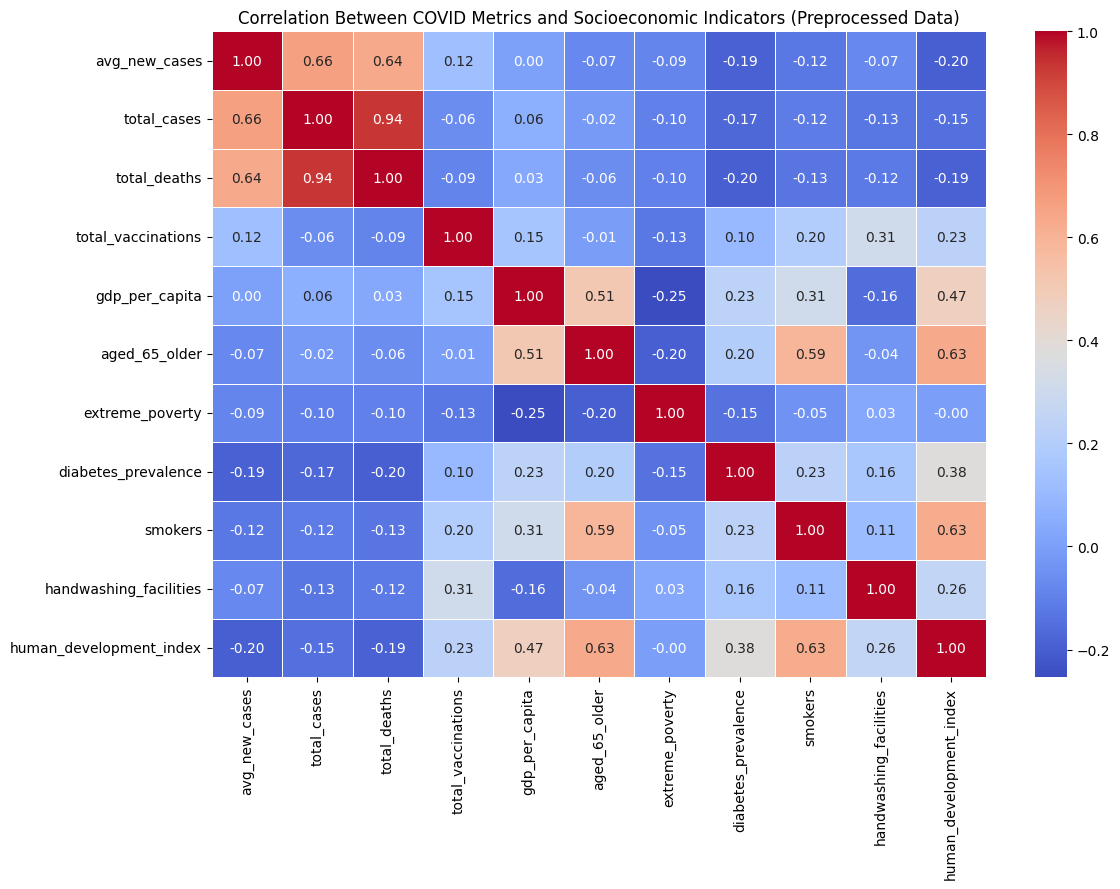

In [15]:


# Use the processed data set.
df = df_prep.copy()

# Needed to get the average of new cases in each country as most dates had 0 cases.
avg_new_cases = df.groupby('location')['new_cases'].mean()

latest = df.sort_values('date').groupby('location').last()
latest['avg_new_cases'] = avg_new_cases
# We combine Female and Male smokers as both of them as separate variables adds complexity and is redundant.
latest['smokers'] = latest[['female_smokers', 'male_smokers']].mean(axis=1)

# All variables used.
selected = latest[[
    'avg_new_cases',
    'total_cases',
    'total_deaths',
    'total_vaccinations',
    'gdp_per_capita',
    'aged_65_older',
    'extreme_poverty',
    'diabetes_prevalence',
    'smokers',
    'handwashing_facilities',
    'human_development_index'
]]

# Clean and throw in variables into the matrix.
clean = selected.dropna()
corr_matrix = clean.corr()

print("\n🔍 Correlation with 'avg_new_cases':")
print(corr_matrix['avg_new_cases'].drop('avg_new_cases').sort_values(ascending=False))

print("\n🔍 Correlation with 'total_cases':")
print(corr_matrix['total_cases'].drop('total_cases').sort_values(ascending=False))

print("\n🔍 Correlation with 'total_deaths':")
print(corr_matrix['total_deaths'].drop('total_deaths').sort_values(ascending=False))

# Creates the heat map for all variables.
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between COVID Metrics and Socioeconomic Indicators (Preprocessed Data)')
plt.tight_layout()
plt.show()
